# Data cleaning and early visualizations

# Importing and cleaning data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import numpy as np

In [2]:
math_df = pd.read_csv('data/student-mat.csv', delimiter = ';') #read csv files into Dataframes for the Portuguese data
port_df = pd.read_csv('data/student-por.csv', delimiter = ';')

In [3]:
# for port_col in port_df.columns:  #This is basically to check if the values are the same for many columns, indicating
#     for math_col in math_df.columns: # the same students were used. This does not seem to be the case, further inspection
#         if port_df[port_col].name == math_df[math_col].name: #s shows they are not the same either.
#             if port_df[port_col] == math_df[math_col]:
#                 print(True)
#             else:
#                 print(False)
#         else: 
#             print('not same column')

len(port_df) == len(math_df) # check their lengths

False

In [4]:
port_df.index.name = 'student' # set index name to student, since they are the same in each and we can consider this
math_df.index.name = 'student' # an ID for the students.

In [18]:
# Here we'll check for null values in the dataframes using isnull()
if port_df.isnull().any().any() == True:
    print('port_df has null values')
else:
    print('port_df has no null values')
    
if math_df.isnull().any().any() == True:
    print('math_df has null values')
else:
    print('math_df has no null values')


port_df has no null values
math_df has no null values


In [19]:
# since there are no null values now we can check for any outliers using describe
math_df.describe().loc[['mean','max','min']]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,abs_group
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.55443,10.908861,10.713924,10.41519,2.508861
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,19.000000,19.000000,20.00000,4.000000
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,0.000000,0.00000,1.000000


In [20]:
port_df.describe().loc[['mean','max','min']]
# since the data is from a non open ended questionare, there is little likelihood for outliers.
# By checking the mean, min, max we can more easily see outliers. We see that the absences have
# some extreme outliers. Also the daily/weekend alcohol consumption seems to potentially
# have some outliers as well. 
# To fix the absences outliers, we can group them into categories such as: absences < 5, 5 < absences < 10, 
# 10 < absences < 15, absences > 15. Which we will do below:

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,abs_group
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.22188,3.930663,3.180277,3.1849,1.502311,2.280431,3.53621,11.399076,11.570108,11.906009,2.218798
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.00000,5.000000,5.000000,5.0000,5.000000,5.000000,5.00000,19.000000,19.000000,19.000000,4.000000
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.0000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000


In [21]:
absence_df = pd.DataFrame(port_df.absences.groupby(port_df.absences).count())    #this is code just to determine the dist-
absence_df = absence_df.rename(columns = {'absences':'student_count'})           # ribution of the absences 
# float(absence_df.student_count[7:].sum())/(absence_df.student_count.sum())

AttributeError: 'DataFrame' object has no attribute 'absences'

In [23]:
port_df.loc[port_df.absences <= 1,'abs_group'] = 1                                # grouping ranges for the absences
port_df.loc[(port_df.absences >= 2) & (port_df.absences <= 3), 'abs_group'] = 2
port_df.loc[(port_df.absences >= 4) & (port_df.absences <= 6), 'abs_group'] = 3
port_df.loc[port_df.absences >= 7, 'abs_group'] = 4
port_df = port_df.drop('absences', axis = 1)

math_df.loc[math_df.absences <= 1,'abs_group'] = 1                                # grouping ranges for the absences
math_df.loc[(math_df.absences >= 2) & (math_df.absences <= 3), 'abs_group'] = 2
math_df.loc[(math_df.absences >= 4) & (math_df.absences <= 6), 'abs_group'] = 3
math_df.loc[math_df.absences >= 7, 'abs_group'] = 4
math_df = math_df.drop('absences', axis = 1)

AttributeError: 'DataFrame' object has no attribute 'absences'

In [24]:
#https://data.oecd.org/pisa/reading-performance-pisa.htm#indicator-chart     (url from where the data was taken)
# here we import data for the PISA test results according to each country 2009
PISA_math_df = pd.read_csv('data/PISA_math2.csv')
PISA_reading_df = pd.read_csv('data/PISA_reading2.csv')
PISA_math_df = PISA_math_df.groupby('LOCATION').mean()
PISA_reading_df = PISA_reading_df.groupby('LOCATION').mean()
PISA_math_df = PISA_math_df.rename(columns = {'Value': 'math_val'})
PISA_reading_df = PISA_reading_df.rename(columns = {'Value': 'reading_val'})
PISA_df = pd.merge(PISA_math_df, PISA_reading_df, how = 'inner', left_index = True, right_index = True)
PISA_df = PISA_df.drop(['TIME_x','Flag Codes_x','TIME_y', 'Flag Codes_y'], axis = 1)    # final test results for 2010

In [25]:
# importing the teacher to student ratio 2010
# https://stats.oecd.org/Index.aspx?DataSetCode=EAG_PERS_RATIO
ratio_df = pd.read_csv('data/ratio.csv')
ratio_df = ratio_df.loc[(ratio_df['Year'] == 2010)]
ratio_df = ratio_df.loc[(ratio_df.INDICATOR == 'PERS_AVG_CLASS')]
ratio_df = ratio_df.loc[ratio_df.REF_SECTOR == 'INST_T']
ratio_df = ratio_df.drop(['ISC11_LEVEL_CAT', 'YEAR', 'Reference Period Code', 'Reference Period', 'PowerCode', 'PowerCode Code', 'Unit Code', 'Unit'], axis = 1)
ratio_df = ratio_df.loc[ratio_df.Value == ratio_df.Value.fillna(0)]
ratio_df = ratio_df.groupby(['COUNTRY']).mean()   #there are multiple values for diff. school levels
ratio_df.rename(columns = {'Value' : 'class_size'}, inplace = True)

In [26]:
#educational spending from the world bank data for year 2009 (% of government expenditure on education)
# Source: https://data.worldbank.org/indicator/SE.XPD.SECO.PC.ZS
spend_df = pd.read_csv('data/API_SE.XPD.SECO.ZS_DS2_en_csv_v2_10250946.csv')
spend_df = spend_df[['Country Code','Indicator Name','2009']]
spend_df.dropna(inplace = True)
spend_df.set_index('Country Code', inplace = True)
spend_df.rename(columns = {'2009': '% of government expenditure on education'}, inplace = True)

In [27]:
for i in PISA_df.index:
    if sum(i == ratio_df.index) == 0:
        PISA_df.drop(i, inplace = True)
for i in ratio_df.index:
    if sum(i == PISA_df.index) == 0:
        ratio_df.drop(i, inplace = True)
PISA_size_df = pd.merge(PISA_df, ratio_df, how = 'inner', left_index=True, right_index=True)
for i in PISA_df.index:
    if sum(i == spend_df.index) == 0:
        PISA_df.drop(i, inplace = True)
for i in spend_df.index:
    if sum(i == PISA_df.index) == 0:
        spend_df.drop(i, inplace = True)
PISA_spend_df = pd.merge(PISA_df, spend_df, how = 'inner', left_index=True, right_index=True)

# Exploratory Data Analysis:

the main question to be asked is: what factors most influence a students educational success? To answer this, it is necessary to take a look at the relationship between the independent variables and the grades obtained in the datasets. 

In the following cell, the average (between the math and reading portions) 2009 PISA grade for each country is plotted against the 'government expenditure on education as a % of the GDP' and the 'average class size'. This presents information about how these variables affect countrywide grades. One can see there is a slight positive correlation for government expenditure, whereas there is a negative correlation with class size. To truly see how this might benefit Portugal, it is important to compare the trends with Portugal's position in them. That is, is Portugals average class size just right, too small, or too large for the given trends. 

As one can see, the average PISA grade has a somewhat positive correlation with the government expenditure on education. Also, one can see a negative correlation between the class size and average PISA grade. 


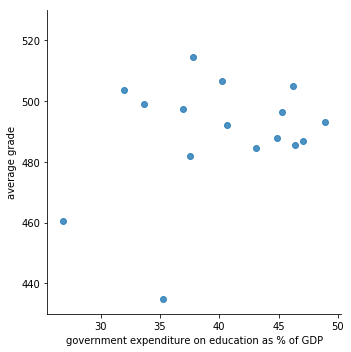

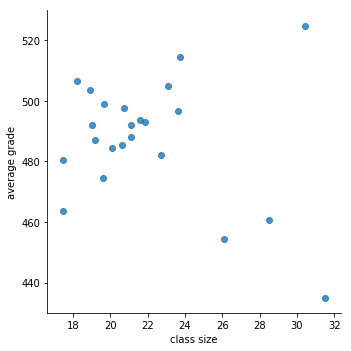

In [28]:
PISA_size_df['avg_grade'] = (PISA_size_df.math_val + PISA_size_df.reading_val)/2
PISA_spend_df['avg_grade'] = (PISA_spend_df.math_val + PISA_spend_df.reading_val)/2
sns.lmplot(x = '% of government expenditure on education', y = 'avg_grade', data = PISA_spend_df, fit_reg = False)
# plt.xlim([17,24])
plt.xlabel('government expenditure on education as % of GDP')
plt.ylabel('average grade')
plt.ylim([430,530])
sns.lmplot(x = 'class_size', y = 'avg_grade', data = PISA_size_df, fit_reg = False)
plt.xlabel('class size')
plt.ylabel('average grade')
# plt.xlim([17,24])
plt.ylim([430,530])
plt.show()

In [29]:
# PISA_size_df['avg_grade'] == PISA_spend_df['avg_grade']
# PISA_spend_df.groupby('avg_grade').count().plot(kind = 'hist')
# plt.show()
# plt.hist(PISA_spend_df.groupby('avg_grade').count().index, PISA_spend_df.groupby('avg_grade').count().math_val)
# sns.distplot(PISA_spend_df.avg_grade, bins = 10)
PISA_spend_df.avg_grade.describe()

# plt.show()

count     20.000000
mean     486.600000
std       35.001729
min      399.000000
25%      483.875000
50%      492.500000
75%      503.875000
max      542.500000
Name: avg_grade, dtype: float64

Here the relationship between final average grades (G3) are plotted against the independent variables present in the questionnaire. When the column is categorical data, a bar plot is used. And when the column has an inherent hierarchy, a scatter plot is used. Note that in each case a 90 % confidence interval is utilized. Also, in the scatter plots a linear regression line is used to fit to the trend. 

As expected, the first and second third grades (G1 and G2) correlate strongly with the final grade (G3).

One of the more interesting observations comes when looking at the students health with respect to final grade. Here a significant negative correlation exists. Indicating that the poorer a students health, the better their grades on average. More work is needed to understand this.

Some other correlations which can be observed are the influence of weekday and weekend alcohol consumption on academic performance. The graphs for both indicate a negative correlation, it may be useful to even group the two if the correlation between them is strong. Another correlation which fits quite well with assumptions is the 'G3 vs. Higher' graph, which shows the preference for higher education in some students. As one would expect, a preference for higher education correlates positively with final grade. 

Aside from the general goal of finding what most influences a students academic success. Another interesting goal might be to understand what 'independent' variables are correlated with one another. For instance, in the case of student health and quality of family life, the two variables are related. It may be possible that other independent variables are related. And as such, one might be able to minimize the variables which are used to assess student performance. Further, This will also aid in our modelling process when machine learning is used. 

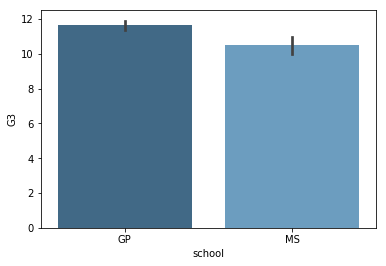

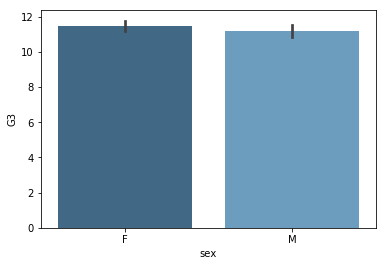

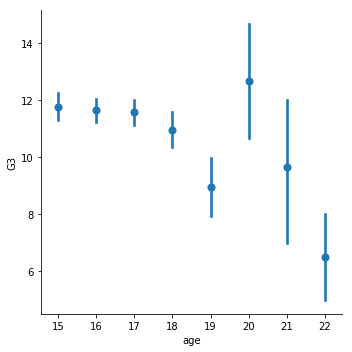

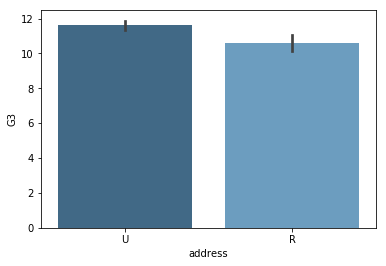

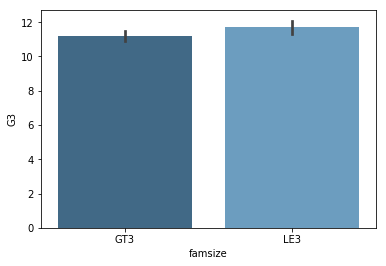

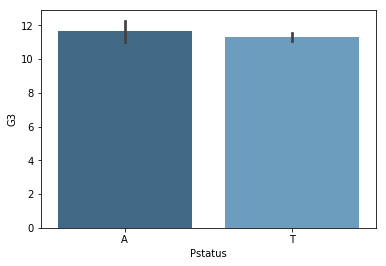

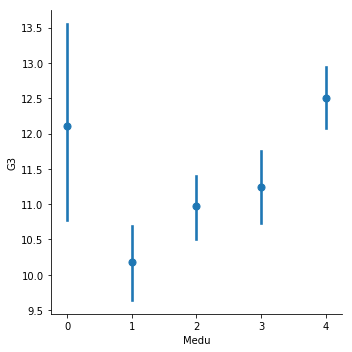

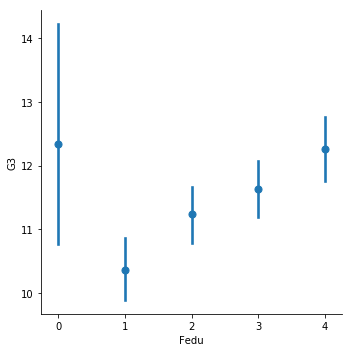

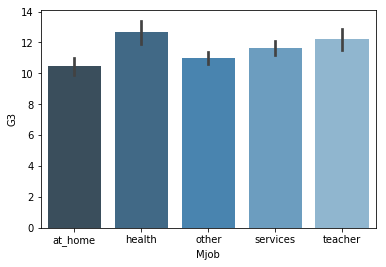

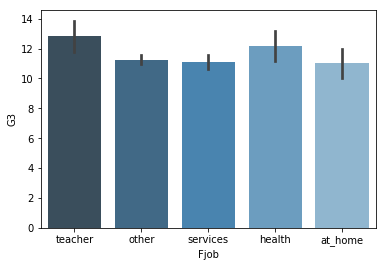

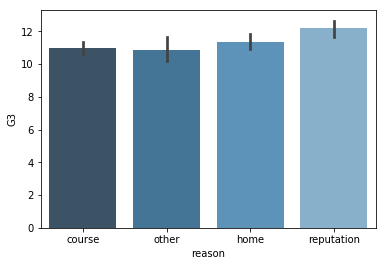

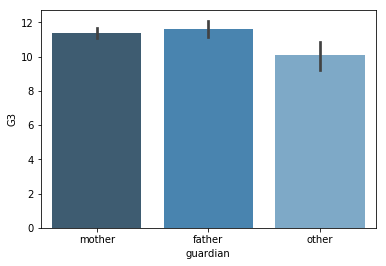

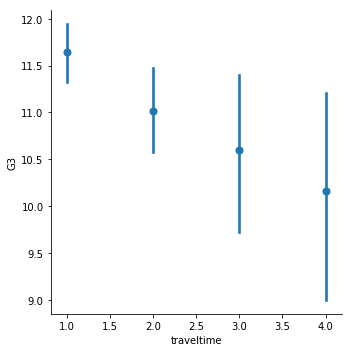

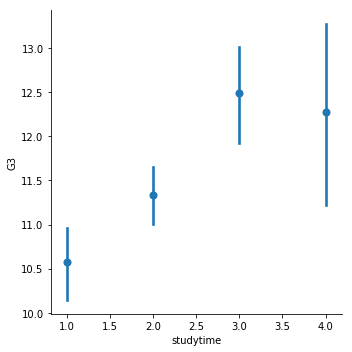

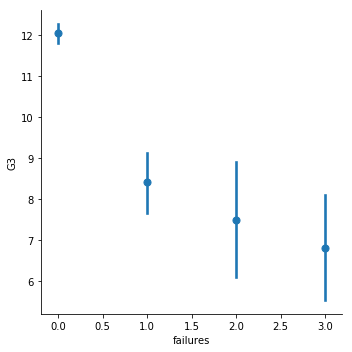

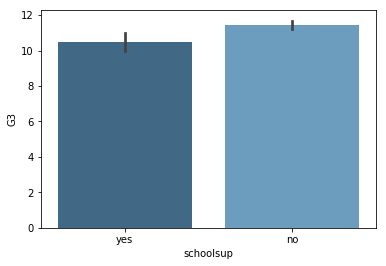

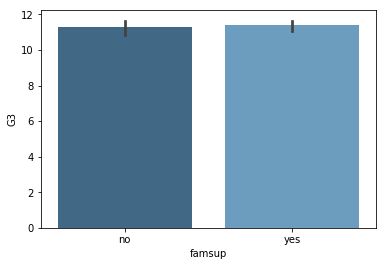

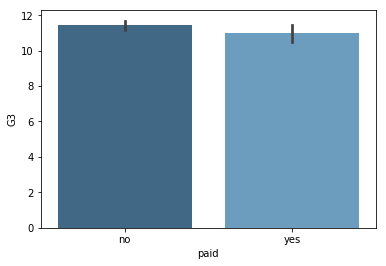

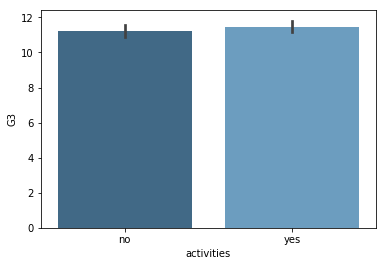

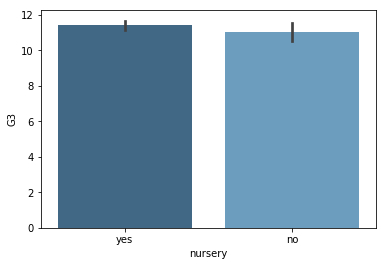

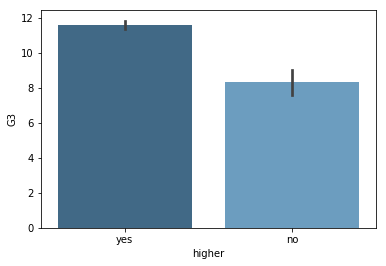

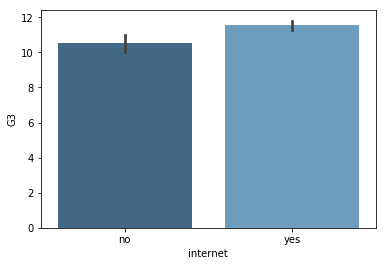

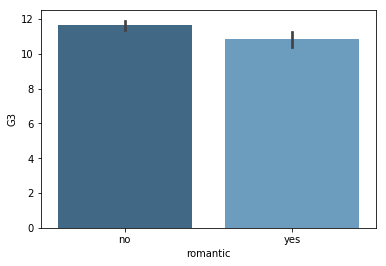

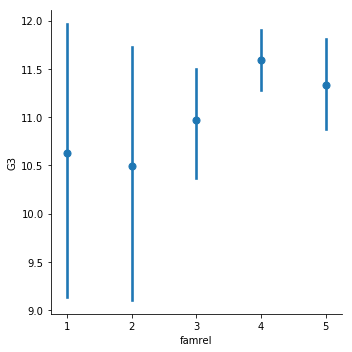

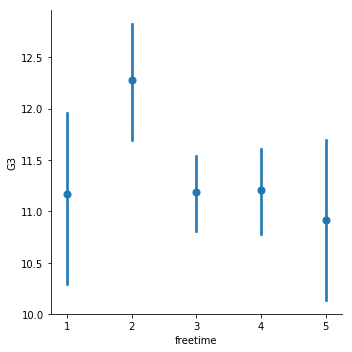

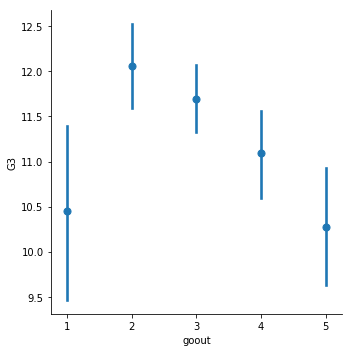

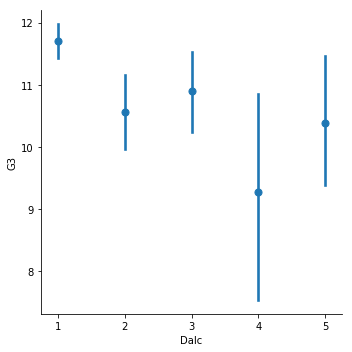

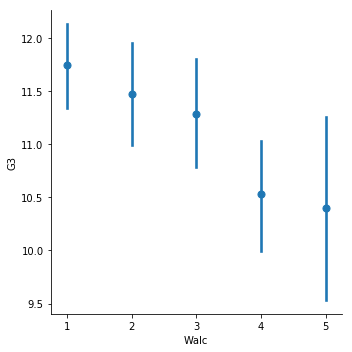

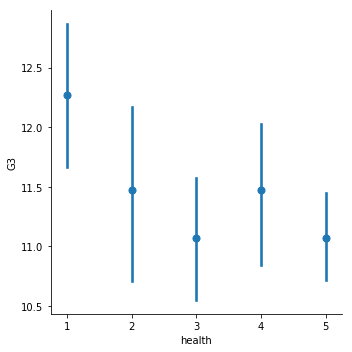

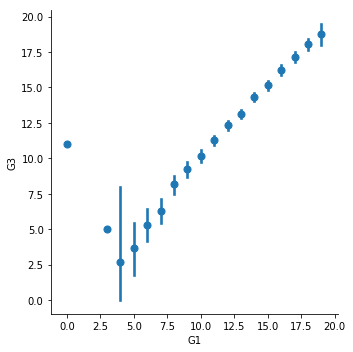

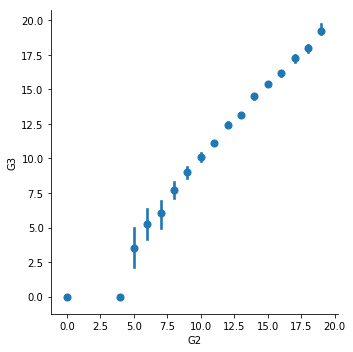

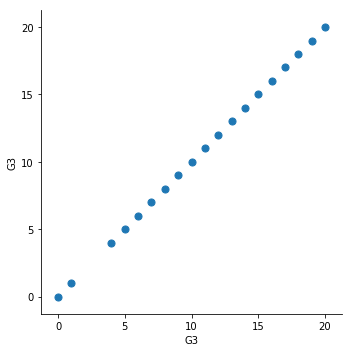

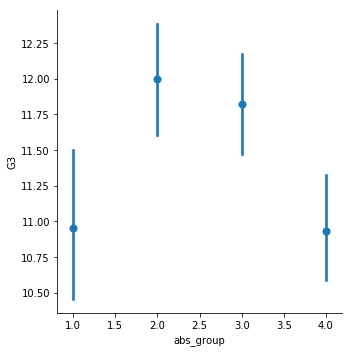

In [31]:
grade_df = pd.merge(math_df, port_df, how = 'outer')  # outer joining the two dataframes to make visualization simpler
for column in grade_df.columns:                       #plotting all of the columns w/ respect to G3
    if type(grade_df[column][0]) == str:
        plt.figure()
        sns.barplot(x = column, y = 'G3', data = grade_df, palette='Blues_d')
    else:
        sns.lmplot(x = column, y = 'G3', data = grade_df, x_estimator = np.mean, fit_reg = False)
# for column in grade_df.columns:
#     if type(grade_df[column][0]) != str:
#         sns.lmplot(x = column, y = 'G3', data = grade_df, x_estimator = np.mean, fit_reg = True)
# sns.barplot(x = 'romantic', y = 'G3', data = grade_df)
# plt.figure()
# sns.barplot(x = 'Pstatus', y = 'G3', data = grade_df)
plt.show()

A hypothesis which can be made and easily verified is that health and quality of family life should be positively correlated. This being because they most likely affect one another in some way. As shown below, one can see this to be true, that there is a positive correlation. However, this leads us to another interesting question. How is it that health and quality of family life are both positively correlated with one another, but they both affect the final grade in different ways? That is, how does good health negatively affect grades while high quality family life positively affects grades? Further investigation will be done to understand this apparent anomaly.

More investigation can be done to 

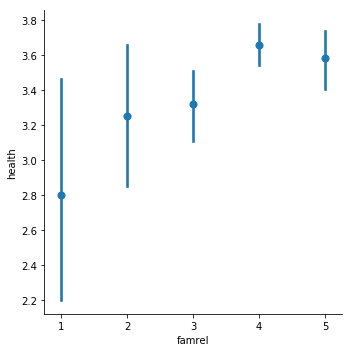

In [32]:
sns.lmplot(x = 'famrel', y = 'health', data = grade_df, x_estimator = np.mean, fit_reg = False)
plt.show()